In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [3]:
data = pd.read_csv(r'C:\Users\HP\Downloads\Data Sceince_tutorial\Working file\train_LZdllcl.csv')

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
data.shape

(54808, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
null_columns = [col for col in data.columns if data[col].isnull().any()]
print("Columns with Null Values:", null_columns)

Columns with Null Values: ['education', 'previous_year_rating']


In [10]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## To list Neuomerical value columns

In [12]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']
numerical_features

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

## To check categorical values

In [14]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [15]:
for cat_feature in categorical_features:
    print(f"\n{cat_feature}:\n{data[cat_feature].value_counts()}\n")


department:
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64


region:
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64


education:
educa

## check data Distribution of missing values features- education & previous_year_rating

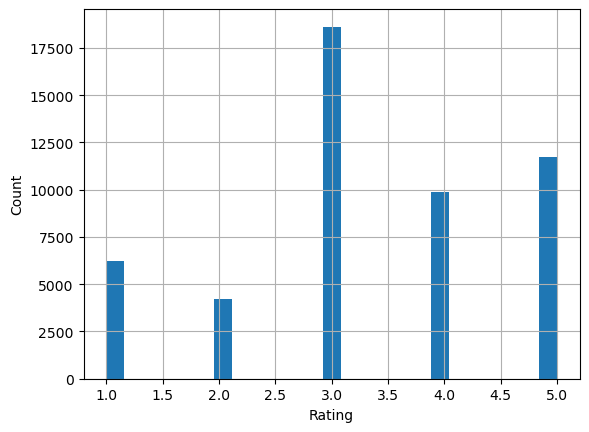

In [17]:
data['previous_year_rating'].hist(bins=25)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

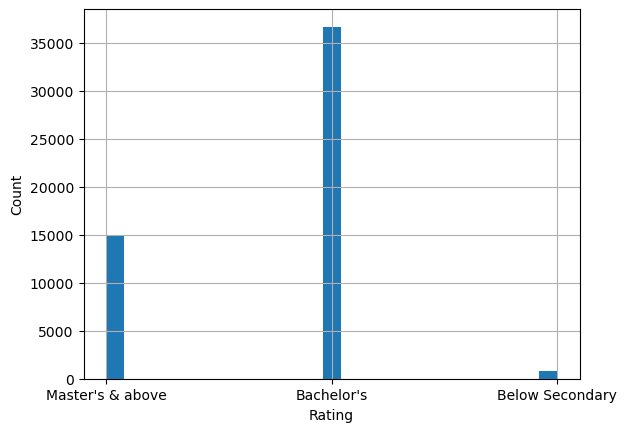

In [18]:
data['education'].hist(bins=25)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

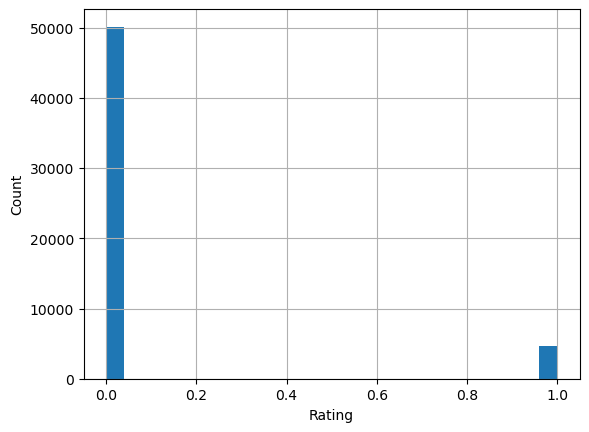

In [19]:
data['is_promoted'].hist(bins=25)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## outlier detection

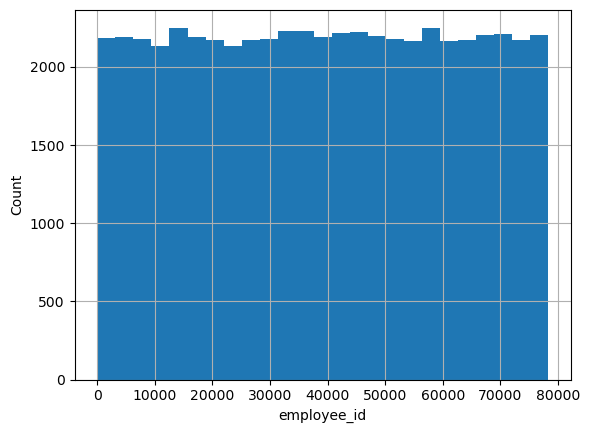

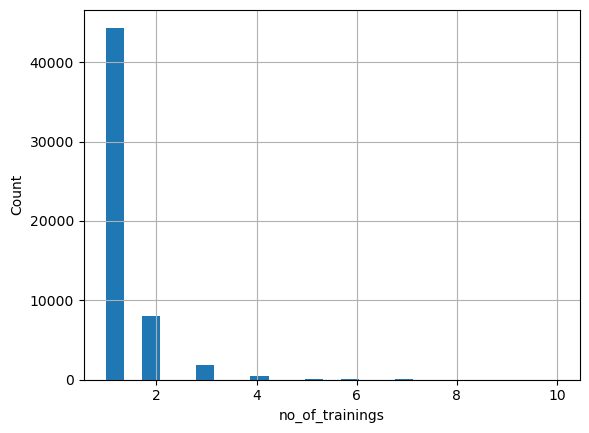

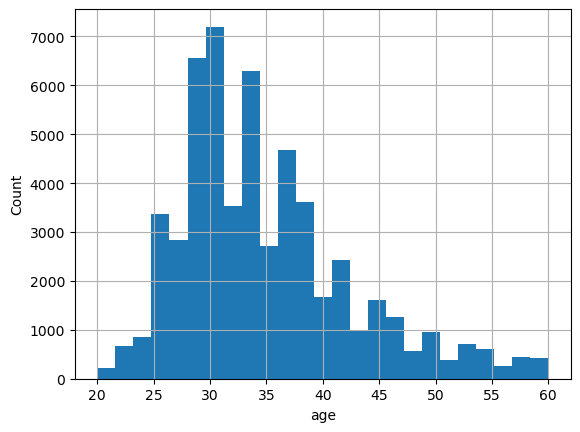

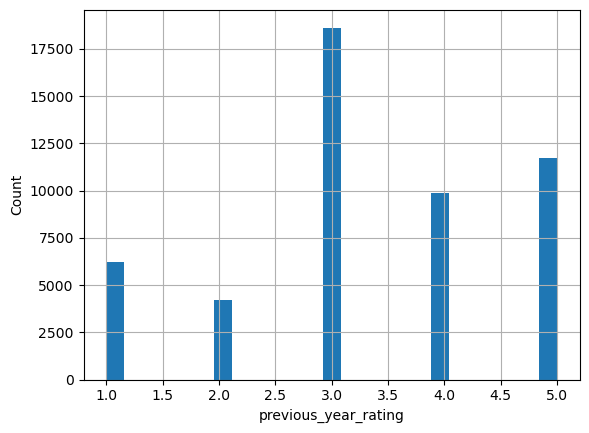

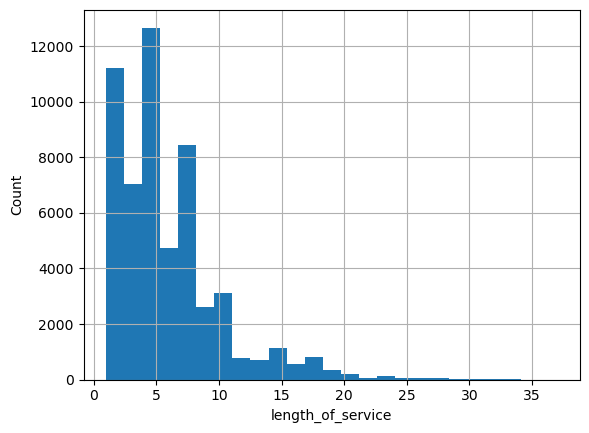

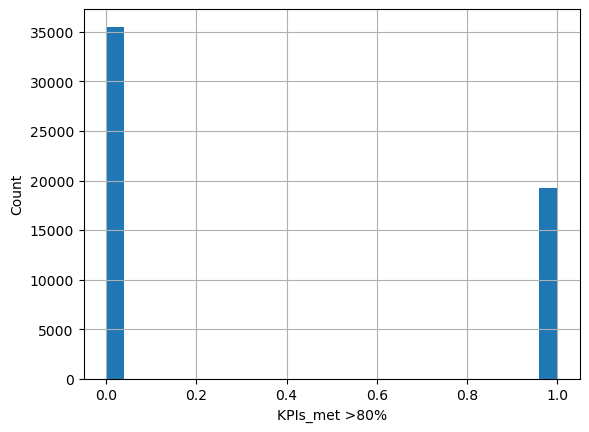

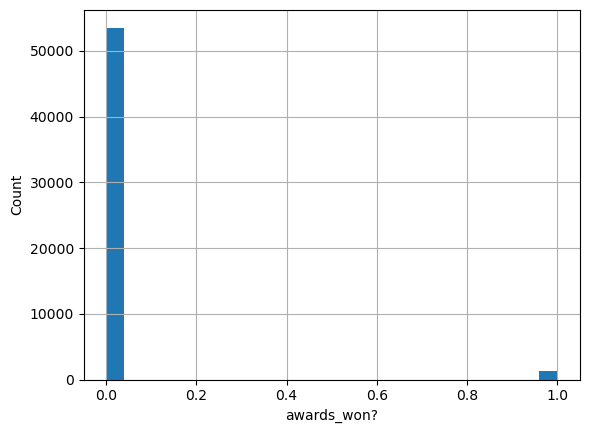

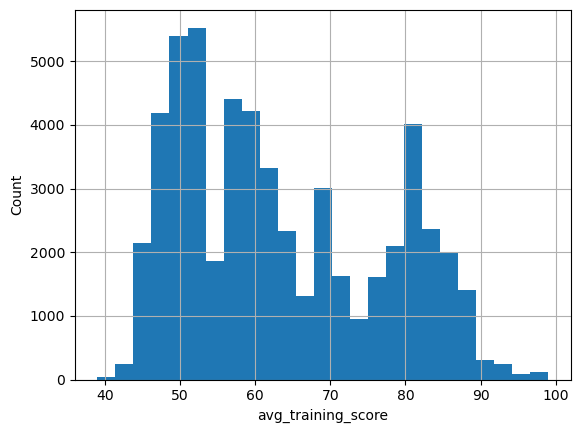

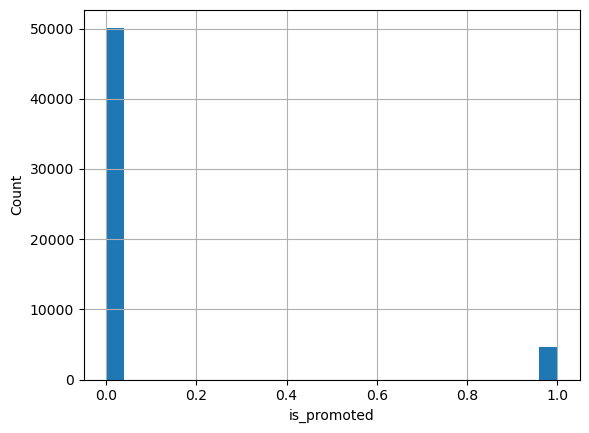

In [21]:
for feature in numerical_features:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## correlation checking

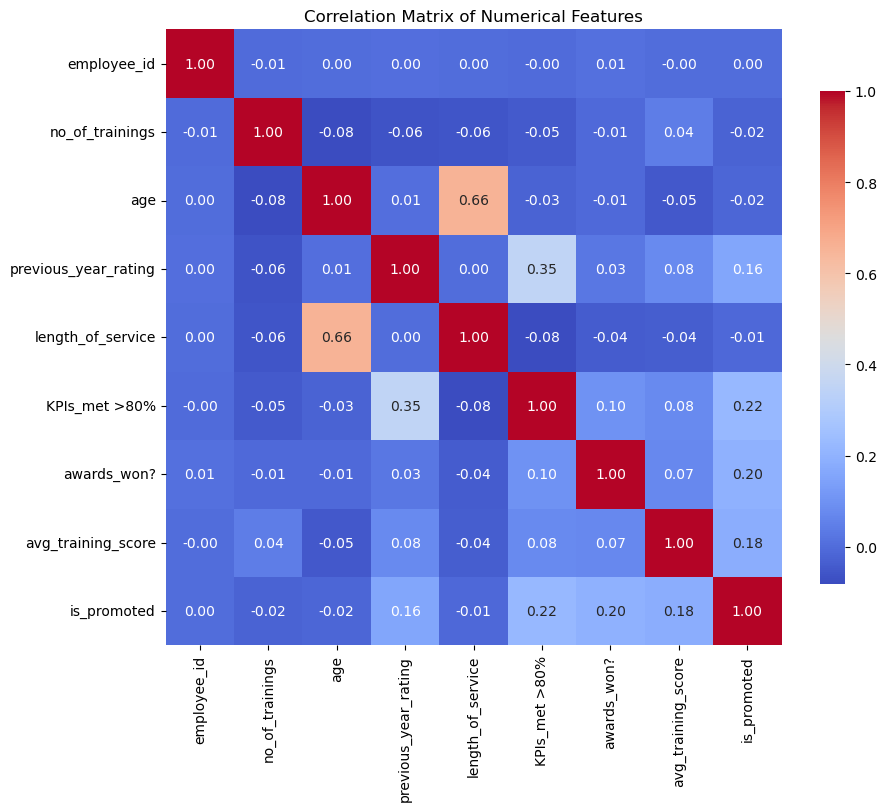

In [23]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## data preprocessing

## feature selection

In [26]:
data = data.drop(['region', 'gender', 'employee_id',
       'recruitment_channel'], axis = 1)

In [27]:
data.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0


In [28]:
data.shape

(54808, 10)

## handling missing values

In [30]:
data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True) #as data is slightly skewed
data['education'].fillna(data['education'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2008\2982356494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True) #as data is slightly skewed
C:\Users\HP\AppData\Local\Temp\ipykernel_2008\2982356494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [31]:
data.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0


In [32]:
data.isna().sum()

department              0
education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [33]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
feat = ['department', 'education',]
for feature in feat:
    le = LabelEncoder()  
    data[feature]= le.fit_transform(data[feature])

In [34]:
data.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,1,35,5.0,8,1,0,49,0
1,4,0,1,30,5.0,4,0,0,60,0
2,7,0,1,34,3.0,7,0,0,50,0
3,7,0,2,39,1.0,10,0,0,50,0
4,8,0,1,45,3.0,2,0,0,73,0


## Modeling

In [36]:
data[['is_promoted']].value_counts()

is_promoted
0              50140
1               4668
Name: count, dtype: int64

## Handle imbalanced data

In [82]:
x = data.drop(['is_promoted'], axis = 1)
y = data['is_promoted']

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state=42)

In [84]:
x_b, y_b=smote.fit_resample(x,y)

## Logistic Regression¶

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_b,y_b,test_size = 0.25,random_state = 42)

In [88]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
y_pred = log_reg.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [94]:
print('F1 Score is: ',f1_score(y_test,y_pred))

F1 Score is:  0.7047928127597262


In [ ]:
y_pred

In [ ]:
confusion_matrix(y_test,y_pred)

## k-NN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
metric_k = []
neighbors = np.arange(3,15)

In [114]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [115]:
metric_k

[0.8928201037096131,
 0.8954128440366973,
 0.8841643398484245,
 0.8896290386916633,
 0.8762265656162744,
 0.8816114878340646,
 0.8696848823294775,
 0.8758276824890308,
 0.8659353809333865,
 0.8717590745911448,
 0.8619864379736737,
 0.8669724770642202]

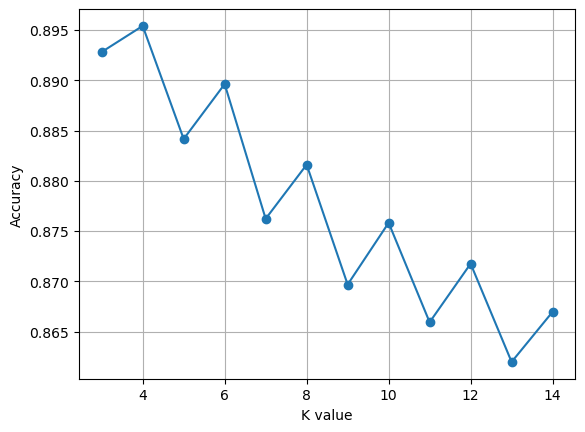

In [116]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [117]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [119]:
print('F1 Score is :',f1_score(y_test,y_predictions))

F1 Score is : 0.897976653696498


In [120]:
confusion_matrix(y_test,y_predictions)

array([[10909,  1738],
       [  884, 11539]], dtype=int64)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

In [ ]:
 y_pred = nb_classifier.predict(x_test)

In [135]:
print('F1 Score is :',f1_score(y_test,y_pred))

F1 Score is : 0.7047928127597262


In [ ]:
confusion_matrix(y_test,y_pred)

## Randomforest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)

In [123]:
y_pred_rf = rf_cls.predict(x_test)

In [124]:
f1_score(y_test,y_pred_rf)

0.9396010490344116

## Test set loading

In [70]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Data Sceince_tutorial\Working file\test_2umaH9m.csv')

In [72]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [137]:
df = df.drop(['region', 'gender','employee_id'
       'recruitment_channel'], axis = 1)

KeyError: "['employee_idrecruitment_channel'] not found in axis"

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True) #as data is slightly skewed
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
feat = ['department', 'education',]
for feature in feat:
    le = LabelEncoder()  
    df[feature]= le.fit_transform(df[feature])

In [ ]:
df.head()

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf_cls_test = RandomForestClassifier()
rf_cls_test.fit(x_train,y_train)
y_test_predict = rf_cls_test.predict(df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- employee_id
- gender
- recruitment_channel
- region


In [ ]:
y_pred_rf = rf_cls.predict(x_test)

In [ ]:
f1_score(y_test,y_pred_rf)

In [146]:
y_pred_rf

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
y_pred_rf.shape

In [150]:
df1 = pd.read_csv(r'C:\Users\HP\Downloads\Data Sceince_tutorial\Working file\sample_submission_M0L0uXE.csv')

In [152]:
df1.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [ ]:
df1.shape

In [156]:
y_pred_rf_trimmed = y_pred_rf[:23490]

In [158]:
df1['is_promoted'] = y_pred_rf_trimmed

In [160]:
df1.head(10)

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,0
3,38562,1
4,64486,1
5,46232,1
6,54542,0
7,67269,1
8,66174,1
9,76303,1


In [162]:
df1.to_csv('Predict_promotion.csv',index=False)